In [10]:
import tensorflow as tf
import os

In [11]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [12]:
tf.config.list_physical_devices('GPU')

[]

In [19]:
import cv2
import imghdr

In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [28]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 943 files belonging to 2 classes.


In [29]:
data_iterator = data.as_numpy_iterator()

In [30]:
batch = data_iterator.next()

In [32]:
data = data.map(lambda x,y: (x/255, y))

In [33]:
data.as_numpy_iterator().next()

(array([[[[0.755208  , 0.7434433 , 0.72383547],
          [0.73465216, 0.72288746, 0.7032796 ],
          [0.7493174 , 0.7375527 , 0.71794486],
          ...,
          [0.7273049 , 0.73122644, 0.70769703],
          [0.748652  , 0.75257355, 0.72904414],
          [0.7085514 , 0.712473  , 0.68894356]],
 
         [[0.7533348 , 0.7415701 , 0.7219623 ],
          [0.7351959 , 0.72343117, 0.7038233 ],
          [0.7343714 , 0.7226067 , 0.7029989 ],
          ...,
          [0.7392218 , 0.7431434 , 0.71961397],
          [0.7426859 , 0.7466075 , 0.7230781 ],
          [0.7307478 , 0.7312533 , 0.70943195]],
 
         [[0.71630156, 0.70453686, 0.684929  ],
          [0.74661076, 0.73484606, 0.7152382 ],
          [0.74892   , 0.7371553 , 0.7175475 ],
          ...,
          [0.7367676 , 0.74068916, 0.71715975],
          [0.7527778 , 0.7566994 , 0.73317   ],
          [0.7302935 , 0.7232929 , 0.70368505]],
 
         ...,
 
         [[0.74911153, 0.7530331 , 0.7295037 ],
          [0.76427

In [34]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [35]:
train_size

21

In [36]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [37]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [39]:
model = Sequential()

In [40]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [41]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [43]:
logdir='logs'

In [44]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [45]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
21/21 [==============================] - 17s 698ms/step - loss: 0.9349 - accuracy: 0.5298 - val_loss: 0.6748 - val_accuracy: 0.5938
Epoch 2/20
21/21 [==============================] - 16s 706ms/step - loss: 0.6459 - accuracy: 0.6458 - val_loss: 0.5873 - val_accuracy: 0.7500
Epoch 3/20
21/21 [==============================] - 16s 711ms/step - loss: 0.5549 - accuracy: 0.7440 - val_loss: 0.5415 - val_accuracy: 0.7552
Epoch 4/20
21/21 [==============================] - 16s 732ms/step - loss: 0.4572 - accuracy: 0.7857 - val_loss: 0.6873 - val_accuracy: 0.6562
Epoch 5/20
21/21 [==============================] - 18s 801ms/step - loss: 0.4203 - accuracy: 0.8140 - val_loss: 0.4966 - val_accuracy: 0.7344
Epoch 6/20
21/21 [==============================] - 17s 745ms/step - loss: 0.2987 - accuracy: 0.8646 - val_loss: 0.3474 - val_accuracy: 0.8802
Epoch 7/20
21/21 [==============================] - 16s 711ms/step - loss: 0.2200 - accuracy: 0.9211 - val_loss: 0.3056 - val_accuracy: 0.8854

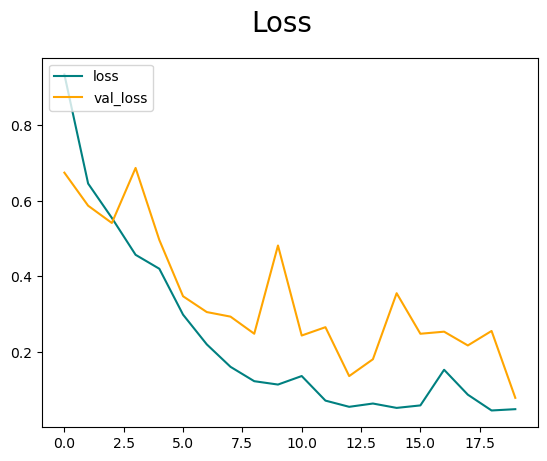

In [46]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

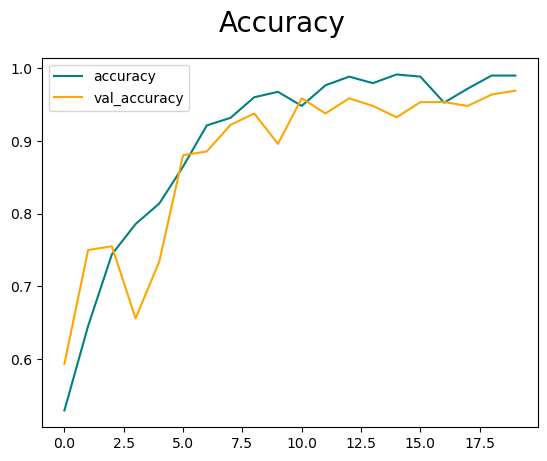

In [47]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [2]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [3]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [17]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

NameError: name 'test' is not defined

In [18]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [19]:
import cv2

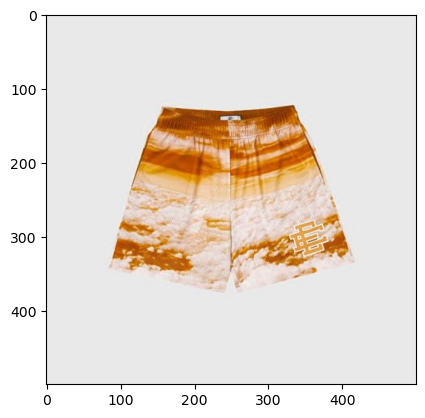

In [47]:
img = cv2.imread('shorts.jpg')
plt.imshow(img)
plt.show()

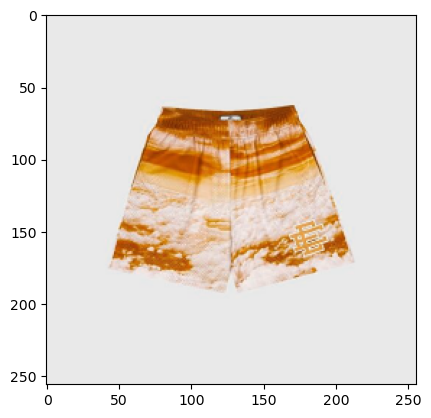

In [48]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [49]:
yhat = model.predict(np.expand_dims(resize/255, 0))

NameError: name 'model' is not defined

In [50]:
yhat

NameError: name 'yhat' is not defined

In [51]:
if yhat > 0.5: 
    print(f'Predicted class is Warm')
else:
    print(f'Predicted class is Cold')

NameError: name 'yhat' is not defined

In [52]:
from tensorflow.keras.models import load_model

In [53]:
model.save(os.path.join('models','clothestemperature.h5'))

NameError: name 'model' is not defined

In [54]:
new_model = load_model('clothestemperature.h5')

In [55]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 71ms/step


array([[0.9989289]], dtype=float32)

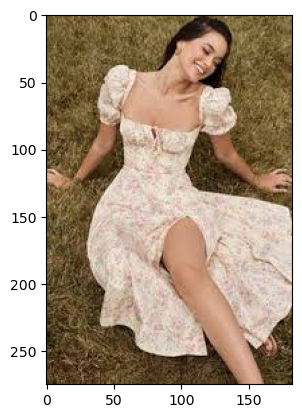

In [89]:
img = cv2.imread('images.jpg')
image2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pixels = np.array(image2)
plt.imshow(pixels)
plt.show()
resize = tf.image.resize(img, (256,256))

In [90]:
prediction = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 25ms/step


In [91]:
if prediction > 0.5: 
    print(f'Predicted for Warm temperature')
else:
    print(f'Predicted for Cold temperature')

Predicted for Warm temperature


In [92]:
prediction

array([[0.9999963]], dtype=float32)